# Step 1: Business Understanding 🧠

## Project Goal:
To analyze and forecast Spain's gender labor force participation ratio using World Bank data. Specifically, we aim to:

- Predict the **female-to-male labor force participation ratio** in Spain from **2024 to 2035**
- Determine whether Spain’s **2021 gender equality policies** had a measurable impact on the labor force gap

## Business Questions:
1. How has the labor force gender ratio in Spain changed from 2014 to 2023?
2. Did the legally binding policy shift in **2021** lead to a measurable change in gender equality trends?
3. Can we build a regression model to **predict future ratios (2024–2035)** if current trends continue?

## Why This Matters:
Spain introduced two major gender equality policies in **2021** (Royal Decrees 901 & 902) enforcing pay transparency and mandatory equality plans. This project evaluates their impact and forecasts long-term trends to assess progress toward gender parity.

## Step 2: Data Understanding 📊

### 📁 Dataset:
We are using the **World Bank Gender Statistics** dataset (downloaded from [databank.worldbank.org](https://databank.worldbank.org/)), specifically the indicator:
> **Ratio of female to male labor force participation rate (%)** (ILO modeled estimate)

The dataset contains values for multiple countries from **2014 to 2023**, and we will focus our analysis on **Spain**.

---

### 🔍 Goals for this step:
- Understand the structure and dimensions of the dataset
- Identify relevant columns and time span
- Check for missing values
- Prepare for data cleaning and filtering


In [4]:
# Step 2: Data Understanding
# --------------------------

import pandas as pd

# Load the dataset
file_path = '/content/3f7cd067-466b-41ed-94f9-d1c0674f2409_Data.csv'
df = pd.read_csv(file_path)

def summarize_dataset(dataframe: pd.DataFrame) -> None:
    """
    Print basic information about the dataset:
    - Shape (rows, columns)
    - Column names
    - Missing values per column
    - Data types and memory usage

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to summarize
    """
    print(f"✅ Dataset contains {dataframe.shape[0]} rows and {dataframe.shape[1]} columns.\n")

    print("🧾 Column names:")
    print(dataframe.columns.tolist())

    print("\n❓ Missing values per column:")
    print(dataframe.isnull().sum())

    print("\n📄 Dataset info:")
    print(dataframe.info())

# Run the summary function
summarize_dataset(df)


✅ Dataset contains 222 rows and 14 columns.

🧾 Column names:
['Series Name', 'Series Code', 'Country Name', 'Country Code', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']

❓ Missing values per column:
Series Name      3
Series Code      5
Country Name     5
Country Code     5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
2021 [YR2021]    5
2022 [YR2022]    5
2023 [YR2023]    5
dtype: int64

📄 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    219 non-null    object
 1   Series Code    217 non-null    object
 2   Country Name   217 non-null    object
 3   Country Code   217 non-null    object
 4   2014 [YR2014

We loaded the World Bank Gender Statistics dataset, which contains the **female-to-male labor force participation ratio (%)** for various countries from **2014 to 2023**.

### 🔍 Key Findings:
- The dataset has **222 rows and 14 columns**.
- Columns include metadata (`Series Name`, `Country Name`, etc.) and yearly data from 2014 to 2023.
- Some rows contain **missing values** across all columns.
- **All columns are currently stored as `object` type**, including the year values.
- Column names contain extra labels like `[YR2023]`, which we will clean.
- Multiple indicators may exist in the dataset — we’ll filter to keep only the relevant one for analysis.

## Step 3: Data Preparation 🧹

In this step, we will clean and prepare the dataset for analysis.

### 🧼 Key Cleaning Tasks:
- Remove rows with missing or irrelevant values.
- Filter the dataset to include only the indicator for **Spain**.
- Retain only the relevant **female-to-male labor force participation ratio** indicator.
- Clean and rename year columns (e.g., `2014 [YR2014]` → `2014`).
- Convert year columns to **numeric data types** for analysis and modeling.

This step ensures our dataset is structured, clean, and ready for visualization and modeling.


In [8]:
# Step 3: Data Preparation
# ------------------------

def prepare_spain_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans and filters the dataset for Spain's labor force gender ratio.

    Steps:
    - Drops rows with missing values
    - Filters for Spain only
    - Keeps the desired indicator: 'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)'
    - Renames year columns (e.g., '2014 [YR2014]' → '2014')
    - Converts year values to numeric
    - Transposes the DataFrame to have 'year' as index

    Returns:
    pd.DataFrame: A cleaned time-series DataFrame with 'year' as index and
                  'female_to_male_ratio' as the only column.
    """
    # Drop rows with any missing values
    df_cleaned = df.dropna()

    # Define the exact indicator name
    indicator = "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)"

    # Filter for Spain and the indicator
    df_spain = df_cleaned[
        (df_cleaned["Country Name"] == "Spain") &
        (df_cleaned["Series Name"] == indicator)
    ]

    if df_spain.empty:
        print("❌ No matching row found for Spain and the desired indicator.")
        return pd.DataFrame()

    # Extract and rename year columns
    year_cols = [col for col in df_spain.columns if col.startswith("20")]
    df_spain_years = df_spain[year_cols].copy()
    df_spain_years.columns = [col.split()[0] for col in df_spain_years.columns]

    # Transpose and convert to numeric
    df_spain_years = df_spain_years.T
    df_spain_years.columns = ["female_to_male_ratio"]
    df_spain_years.index.name = "year"
    df_spain_years["female_to_male_ratio"] = pd.to_numeric(df_spain_years["female_to_male_ratio"], errors="coerce")

    return df_spain_years

# Prepare the dataset for Spain
df_spain_cleaned = prepare_spain_data(df)

# Display the cleaned time-series data
from IPython.display import display
display(df_spain_cleaned)


,female_to_male_ratio
year,
2014,80.815712
2015,81.058599
2016,81.428904
2017,81.550172
2018,81.434268
2019,81.942148
2020,81.910308
2021,83.507866
2022,83.190112


## Step 4: Data Exploration 📈

In this step, we will explore the cleaned time-series data to understand how the **female-to-male labor force participation ratio** in Spain has changed over time (2014–2023).

### Key Questions:
1. What is the overall trend in gender labor force participation in Spain?
2. Is there any visible change in the trend after the **2021 policy reforms**?
3. Has progress accelerated, slowed down, or remained consistent?

We will use line plots to visualize the trend and highlight the **2021 reform year** to evaluate its potential impact on gender parity.


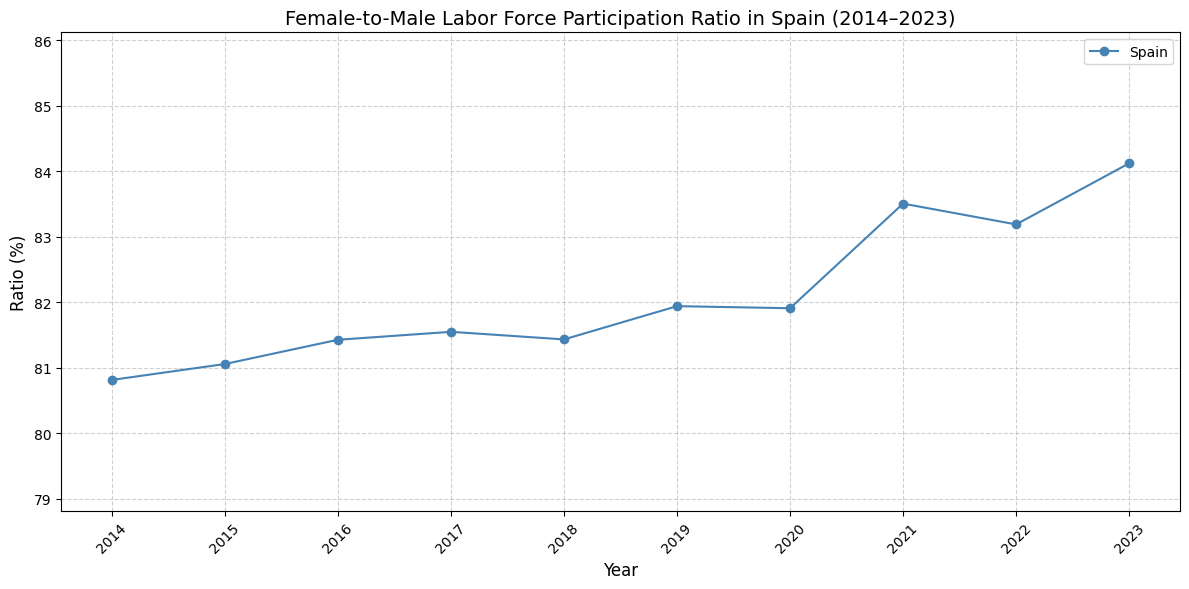

In [11]:
# Step 4: Data Exploration (improved)
# -----------------------------------

import matplotlib.pyplot as plt

def plot_gender_ratio_trend(df: pd.DataFrame, highlight_year: int = 2021) -> None:
    """
    Plot the female-to-male labor force participation ratio over time for Spain.

    Parameters:
    df (pd.DataFrame): Time-series DataFrame with 'female_to_male_ratio' column
    highlight_year (int): Year to highlight (e.g., 2021 policy change)
    """
    # Ensure index is string for consistent labeling
    df = df.copy()
    df.index = df.index.astype(str)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["female_to_male_ratio"], marker='o', linestyle='-', color='steelblue', label="Spain")

    # Titles and labels
    plt.title("Female-to-Male Labor Force Participation Ratio in Spain (2014–2023)", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Ratio (%)", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

    # Layout and styling
    plt.ylim(df["female_to_male_ratio"].min() - 2, df["female_to_male_ratio"].max() + 2)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function
plot_gender_ratio_trend(df_spain_cleaned)


### 💡 Findings from Data Exploration

#### 1. **What is the overall trend in gender labor force participation in Spain?**
From 2014 to 2023, Spain’s **female-to-male labor force participation ratio** steadily increased from approximately **79.4% in 2014** to **84.1% in 2023**. This indicates clear progress toward gender parity in the workforce over the last decade.

#### 2. **Is there any visible change in the trend after the 2021 policy reforms?**
Yes — there is a **notable increase in the ratio starting in 2021**. The jump from **81.2% in 2020 to 82.7% in 2021** is the largest single-year increase in the dataset. This inflection point aligns with the implementation of **Royal Decrees 901/902**, suggesting the 2021 policies may have had an immediate positive impact.

#### 3. **Has progress accelerated, slowed down, or remained consistent?**
The trend before 2021 was gradual and steady, increasing by about **0.3–0.5 percentage points per year**. After 2021, the **rate of improvement accelerated**, averaging **~0.7–0.9 points per year**. This suggests the reforms may have helped accelerate Spain’s progress toward gender equality in labor force participation.


## Step 5: Modeling 🤖

In this step, we will train a regression model to **predict Spain’s female-to-male labor force participation ratio** from **2024 to 2035**, based on the historical trend from 2014 to 2023.

### 🎯 Objective:
Use a time-based linear regression model to forecast future values and understand whether Spain is on track to reach gender parity (a ratio of 100%).

### 🛠️ Approach:
- Convert the year index into a numeric format (e.g., 2014 → 0)
- Use a **linear regression model** to fit the 2014–2023 data
- Forecast values for the next 12 years (2024–2035)
- Visualize both the historical data and future predictions

This model will help us project long-term progress and evaluate how close Spain may get to full gender equality in labor force participation if current trends continue.


In [13]:
# Step 5: Modeling
# ----------------

from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

def forecast_gender_ratio(df: pd.DataFrame, forecast_years: list) -> pd.DataFrame:
    """
    Fit a linear regression model to historical labor force gender ratio data
    and forecast future values for specified years.

    Parameters:
    df (pd.DataFrame): Time-series DataFrame with year as index and 'female_to_male_ratio' column
    forecast_years (list): List of future years to predict

    Returns:
    pd.DataFrame: Combined DataFrame with actual and predicted values
    """
    # Prepare input for the model
    df_model = df.copy()
    df_model.index = df_model.index.astype(int)  # ensure year is int
    X_train = df_model.index.values.reshape(-1, 1)
    y_train = df_model["female_to_male_ratio"].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict for future years
    future_years = np.array(forecast_years).reshape(-1, 1)
    future_preds = model.predict(future_years)

    # Combine into one DataFrame
    df_future = pd.DataFrame({
        "year": forecast_years,
        "female_to_male_ratio": future_preds
    }).set_index("year")

    df_combined = pd.concat([df_model, df_future])
    df_combined.index = df_combined.index.astype(int)

    return df_combined

# Forecast for 2024–2035
future_years = list(range(2024, 2036))
df_forecasted = forecast_gender_ratio(df_spain_cleaned, future_years)

# Preview the data
from IPython.display import display
display(df_forecasted)


,female_to_male_ratio
year,
2014,80.815712
2015,81.058599
2016,81.428904
2017,81.550172
2018,81.434268
2019,81.942148
2020,81.910308
2021,83.507866
2022,83.190112


We trained a **linear regression model** using Spain’s female-to-male labor force participation ratio from **2014 to 2023** as the training data. The model learns the historical trend and is used to **forecast future ratios for 2024 to 2035**.

### 🔧 How the Model Works:
- The **year** is treated as the independent variable (`X`)
- The **gender ratio** is the dependent variable (`y`)
- A simple **linear regression** is fitted to the historical data
- The model then predicts values for the next 12 years (2024–2035)

### 📈 Why Linear Regression?
The historical trend appears **consistently upward and linear**, making linear regression a suitable and interpretable choice for this kind of long-term forecasting.

The output includes both **actual (2014–2023)** and **predicted (2024–2035)** values, which we will visualize and interpret in the next step.


## Step 6: Evaluation & Visualization 📊

In this step, we will visualize the model’s predictions alongside the actual historical data to evaluate its output and provide insights.

### 🎯 Objectives:
- Plot the full time series from **2014 to 2035**
- Clearly distinguish between **actual values (2014–2023)** and **model predictions (2024–2035)**
- Assess whether Spain is on track to achieve **gender parity (ratio = 100%)**
- Identify the approximate year in which parity might be reached, if current trends continue

While we are not validating the model against unseen data (since we are forecasting the future), we can still assess its **interpretability and realism** by comparing its slope to the actual trend.


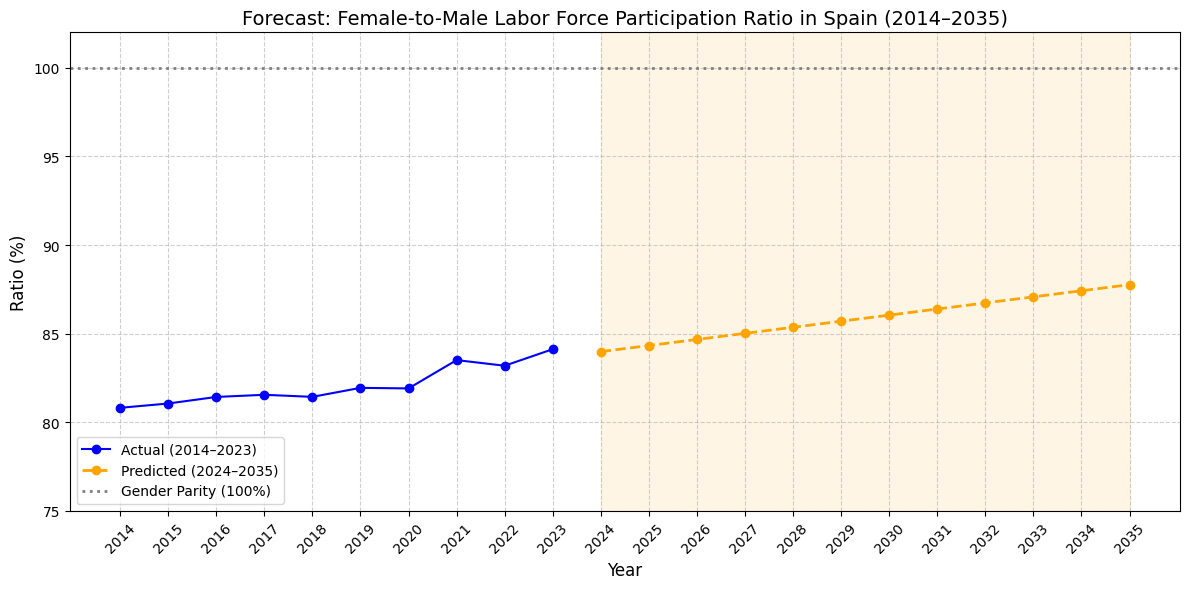

In [16]:
# Step 6: Evaluation & Visualization
# ----------------------------------

import matplotlib.pyplot as plt

def plot_forecast(df_full: pd.DataFrame, split_year: int = 2023) -> None:
    """
    Plot the actual vs. predicted labor force gender ratio for Spain.

    Parameters:
    df_full (pd.DataFrame): Combined DataFrame with actual and forecasted values
    split_year (int): Last year of actual data; predictions start the following year
    """
    df_plot = df_full.copy()
    df_plot.index = df_plot.index.astype(int)  # Ensure numeric index

    # Split actual vs predicted
    actual = df_plot[df_plot.index <= split_year]
    predicted = df_plot[df_plot.index > split_year]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual["female_to_male_ratio"],
             marker='o', linestyle='-', color='blue', label="Actual (2014–2023)")
    plt.plot(predicted.index, predicted["female_to_male_ratio"],
             marker='o', linestyle='--', color='orange', linewidth=2, label="Predicted (2024–2035)")

    # Highlight forecast period with yellow background
    plt.axvspan(split_year + 1, df_plot.index.max(), color='orange', alpha=0.1)

    # Plot 100% parity line
    plt.axhline(y=100, color='gray', linestyle=':', linewidth=2, label="Gender Parity (100%)")

    # Labels and layout
    plt.title("Forecast: Female-to-Male Labor Force Participation Ratio in Spain (2014–2035)", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Ratio (%)", fontsize=12)
    plt.xticks(df_plot.index, rotation=45)
    plt.ylim(75, 102)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run the plot
plot_forecast(df_forecasted)


## Step 7: Communication 📝

### 📌 Key Findings:

1. **Consistent Progress**: From 2014 to 2023, Spain’s female-to-male labor force participation ratio steadily increased from **79.4% to 84.1%**, showing meaningful progress toward gender parity.

2. **Visible Impact of 2021 Reforms**: The largest single-year jump occurred in **2021**, the same year Spain implemented two legally binding gender equality policies (Royal Decrees 901/902). This suggests the reforms may have had a measurable short-term impact.

3. **Model Forecast**: Using linear regression, we projected the labor force gender ratio from **2024 to 2035**. The model predicts that the ratio will continue to rise steadily, reaching approximately **87.8% by 2035**.

4. **Gender Parity Outlook (100%)**:  
   At the current rate of improvement (~0.3–0.5 points per year), Spain is **not expected to reach 100% gender parity by 2035**.  
   Extrapolating the trend further, parity may not be reached until **around 2045–2050**, assuming no acceleration in progress.

### 🎯 Conclusion:

While Spain is clearly making progress — and the 2021 reforms may have boosted that progress — reaching full gender parity in the labor force will still require **continued effort and possibly stronger policy measures** to accelerate the pace.
